# 1 Installing packages and dependencies used

In [1]:
import cv2
from matplotlib import pyplot as plt
import os
import time
import numpy as np
import mediapipe as mp

# 2. Getting keypoints data from Mediapipe Landmarks from image captured

In [2]:
#Getting keypoints data from Mediapipe Landmarks from image captured
#Creating Landmarks for images using Mp Holistic

mp_holistic = mp.solutions.holistic #holistic model

#draw utils used to draw landmarks on object detected (face, pose, right hand, left hand)
mp_drawing = mp.solutions.drawing_utils #drawing utilities

In [3]:
#Creating Functions for Landmarks detection
def mediapipe_detection(image, model):
    #cvt color used to converts an input image from one color to another
    #variabel image used to store data from landmarks
    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #color conversion from BGR to RGB
    image.flags.writeable = False                  # Image no longer writeable
    results = model.process(image)                 # Making predictions
    image.flags.writeable = True                   #Image is now writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) #color conversion from RGB to BGR
    return image, results                          #returning the result to the loop

In [4]:
#Creating Functions for Landmarks drawing
def draw_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [5]:
#Opening Camera for Image Collection
cap = cv2.VideoCapture(0)
#setting mediapipe model
#min det con is for initial detection, and min tracking it will make initial detection and to track the keypoints
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        #reading feed from webcam
        ret, frame = cap.read()

        #making detections
        image, results = mediapipe_detection(frame, holistic)
        
        #draw landmarks
        draw_landmarks(image, results)

        #open cv feed window
        cv2.imshow('FRAME', image)

        #breaking the window
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2. destroyAllWindows()

# 3. Extracting keypoints value

In [6]:
results.pose_landmarks.landmark

[x: 0.5340447425842285
y: 0.7640661597251892
z: -1.0550549030303955
visibility: 0.9996164441108704
, x: 0.5620813369750977
y: 0.6879018545150757
z: -0.9976536631584167
visibility: 0.9996585845947266
, x: 0.5813713073730469
y: 0.6874697208404541
z: -0.9973495602607727
visibility: 0.9996562600135803
, x: 0.5998185276985168
y: 0.6874153017997742
z: -0.9970291256904602
visibility: 0.9996837973594666
, x: 0.49720606207847595
y: 0.689967691898346
z: -0.9951001405715942
visibility: 0.9995580911636353
, x: 0.4682108461856842
y: 0.6898065805435181
z: -0.9935749769210815
visibility: 0.9994696378707886
, x: 0.4431533217430115
y: 0.6915319561958313
z: -0.9934880137443542
visibility: 0.9993994235992432
, x: 0.6227082014083862
y: 0.7119970321655273
z: -0.5752580761909485
visibility: 0.9996841549873352
, x: 0.4022272527217865
y: 0.7234110236167908
z: -0.5669659376144409
visibility: 0.9994871020317078
, x: 0.5623099207878113
y: 0.8392722010612488
z: -0.8997319340705872
visibility: 0.9987766742706299
,

In [7]:
results.face_landmarks.landmark

[x: 0.5374282598495483
y: 0.8193449974060059
z: -0.03356611356139183
, x: 0.5407240390777588
y: 0.7680990695953369
z: -0.06160731241106987
, x: 0.5381433963775635
y: 0.7843581438064575
z: -0.032569147646427155
, x: 0.5286251306533813
y: 0.7155100703239441
z: -0.04754939302802086
, x: 0.5409635901451111
y: 0.7514776587486267
z: -0.06557580083608627
, x: 0.5401291847229004
y: 0.7301943898200989
z: -0.061075761914253235
, x: 0.5368332266807556
y: 0.6796153783798218
z: -0.030224541202187538
, x: 0.447990745306015
y: 0.6756393909454346
z: 0.006785720586776733
, x: 0.5358035564422607
y: 0.6368430256843567
z: -0.022821126505732536
, x: 0.5360113978385925
y: 0.6140841841697693
z: -0.025224637240171432
, x: 0.5352482199668884
y: 0.5376920104026794
z: -0.013991300016641617
, x: 0.5371261835098267
y: 0.8273752331733704
z: -0.032059863209724426
, x: 0.536451518535614
y: 0.8339017629623413
z: -0.02820539101958275
, x: 0.5357187986373901
y: 0.836735188961029
z: -0.02302759885787964
, x: 0.5356531143

In [8]:
len(results.face_landmarks.landmark)

468

In [9]:
len(results.pose_landmarks.landmark)

33

In [10]:
#extracting existed keypoints, keypoints from collected images before will be inserted inside a variable
#every data will be flatten to be 1 big array
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [11]:
extract_keypoints(results).shape

(1662,)

In [12]:
result_test = extract_keypoints(results)

In [13]:
np.save('0', result_test)

In [14]:
np.load('0.npy')

array([ 0.53404474,  0.76406616, -1.0550549 , ...,  0.        ,
        0.        ,  0.        ])

# 4. Setuping Folder for Data Collection

In [15]:
#Setuping Folder for Data Collection

#path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data')

#actions that being tried to detect
actions = np.array(['Saya','Anda','Terima Kasih','Maaf','Cinta'])

#thirty videos worth of data
no_sequences = 30

#videos going to be 10 frames in length in every video
sequence_length = 20

In [16]:
for action in actions: #will ngeloop on action variable making process
    for sequence in range(no_sequences): #will loop on how much sequences value is
        try: 
            #will create folder when the loop is same as the string's name
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collecting landmarks Dataset for Training and Testing

In [ ]:
#Collecting landmarks Dataset for Training and Testing

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'MULAI PENGAMBILAN GAMBAR', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Pengambilan gambar untuk {} Urutan Ke-{} '.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('Data Collecting', image)
                    cv2.waitKey(4000)
                else: 
                    cv2.putText(image, 'Pengambilan gambar untuk {} Urutan Ke-{} '.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('Data Collecting', image)
                
                # NEW Export keypoints
                # data keypoints yang didapet bakal di extract kedalam folder dari setiap action yang ada
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

# 6. Data Preprocessing

In [17]:
#importing model selection for splitting data into train and test
from sklearn.model_selection import train_test_split

#using to_categorical to convert data
from tensorflow.keras.utils import to_categorical

In [18]:
#creating label map to define every action label
label_map = {label:num for num, label in enumerate(actions)}

In [19]:
label_map

{'Saya': 0, 'Anda': 1, 'Terima Kasih': 2, 'Maaf': 3, 'Cinta': 4}

In [20]:
sequences, labels = [], [] #sequences represents x data (features) and labels is y data (labels)
for action in actions:
    for sequence in range(no_sequences): #gonna loop thru 30 videos, videos became sequences
        window = [] #represent all the different frames for particular sequences
        
        #loading up every frames in a sequence from 0 to 29 then going to the next sequence
        for frame_num in range(sequence_length): #dalam setiap frame sesuai nomornya
            #using numpy to load array frame yang tadi ada sebelumnya, sampingnya adalah path data sequencenya
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [21]:
#converting data for one hot encoding
y = to_categorical(labels).astype(int)

In [22]:
y

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0,

In [23]:
np.array(sequences).shape

(150, 20, 1662)

In [24]:
np.array(labels).shape

(150,)

In [25]:
#data from sequence before will be stored in np array
X = np.array(sequences)

In [26]:
#jumlah keseluruhan data
#there are 150 sequence with 20 frame totalling 1662 data on each frame
X.shape

(150, 20, 1662)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.05)

In [28]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)

In [29]:
X_val.shape

(15, 20, 1662)

In [30]:
y_val.shape

(15, 5)

In [31]:
X_test.shape

(8, 20, 1662)

In [32]:
y_test.shape

(8, 5)

In [33]:
X_train.shape

(127, 20, 1662)

In [34]:
y_train.shape

(127, 5)

# 7. Building and Training LSTM Neural Network Model

In [35]:
#sequential to build sequential neural network
from tensorflow.keras.models import Sequential
#going to be LSTM layer to build neural network, Dense for fully connected layer
from tensorflow.keras.layers import LSTM, Dense
#logging into tensorboard for tracing model training
from tensorflow.keras.callbacks import TensorBoard

In [36]:
X_train.shape

(127, 20, 1662)

In [39]:
#tensorboard callback (web udates to trace neural network training)
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [40]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(20,1662)))
model.add(LSTM(32, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [41]:
#categorical entropy is used because binaries classification model
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [59]:
#can add ons from keras to stop training once the data is fit
history = model.fit(X_train, y_train, epochs=200, callbacks=[tb_callback], validation_data=(X_val, y_val))

Epoch 1/200
4/4 [==============================] - 1s 125ms/step - loss: 0.1150 - categorical_accuracy: 0.9764 - val_loss: 0.2318 - val_categorical_accuracy: 0.9333
Epoch 2/200
4/4 [==============================] - 0s 102ms/step - loss: 0.1057 - categorical_accuracy: 0.9843 - val_loss: 0.4601 - val_categorical_accuracy: 0.9333
Epoch 3/200
4/4 [==============================] - 0s 115ms/step - loss: 0.0910 - categorical_accuracy: 0.9764 - val_loss: 0.3209 - val_categorical_accuracy: 0.9333
Epoch 4/200
4/4 [==============================] - 0s 97ms/step - loss: 0.0583 - categorical_accuracy: 0.9843 - val_loss: 0.2180 - val_categorical_accuracy: 0.9333
Epoch 5/200
4/4 [==============================] - 0s 96ms/step - loss: 0.0469 - categorical_accuracy: 0.9843 - val_loss: 0.2137 - val_categorical_accuracy: 0.8667
Epoch 6/200
4/4 [==============================] - 0s 94ms/step - loss: 0.0666 - categorical_accuracy: 0.9685 - val_loss: 0.3655 - val_categorical_accuracy: 0.9333
Epoch 7/200
4

Epoch 51/200
4/4 [==============================] - 0s 100ms/step - loss: 0.3585 - categorical_accuracy: 0.8583 - val_loss: 0.3826 - val_categorical_accuracy: 0.8000
Epoch 52/200
4/4 [==============================] - 0s 85ms/step - loss: 0.1035 - categorical_accuracy: 0.9606 - val_loss: 0.5810 - val_categorical_accuracy: 0.8667
Epoch 53/200
4/4 [==============================] - 0s 96ms/step - loss: 0.1933 - categorical_accuracy: 0.9213 - val_loss: 0.2442 - val_categorical_accuracy: 0.8667
Epoch 54/200
4/4 [==============================] - 0s 90ms/step - loss: 0.1817 - categorical_accuracy: 0.9370 - val_loss: 0.8999 - val_categorical_accuracy: 0.6000
Epoch 55/200
4/4 [==============================] - 0s 90ms/step - loss: 0.6256 - categorical_accuracy: 0.7402 - val_loss: 0.3524 - val_categorical_accuracy: 0.8667
Epoch 56/200
4/4 [==============================] - 0s 86ms/step - loss: 1.1107 - categorical_accuracy: 0.7559 - val_loss: 0.5071 - val_categorical_accuracy: 0.6667
Epoch 57/

4/4 [==============================] - 0s 99ms/step - loss: 0.0269 - categorical_accuracy: 1.0000 - val_loss: 0.6793 - val_categorical_accuracy: 0.9333
Epoch 150/200
4/4 [==============================] - 0s 89ms/step - loss: 0.0231 - categorical_accuracy: 0.9921 - val_loss: 0.7457 - val_categorical_accuracy: 0.9333
Epoch 151/200
4/4 [==============================] - 0s 99ms/step - loss: 0.0203 - categorical_accuracy: 0.9921 - val_loss: 0.8763 - val_categorical_accuracy: 0.9333
Epoch 152/200
4/4 [==============================] - 0s 89ms/step - loss: 0.0196 - categorical_accuracy: 0.9921 - val_loss: 0.9717 - val_categorical_accuracy: 0.9333
Epoch 153/200
4/4 [==============================] - 0s 94ms/step - loss: 0.0150 - categorical_accuracy: 1.0000 - val_loss: 0.8157 - val_categorical_accuracy: 0.9333
Epoch 154/200
4/4 [==============================] - 0s 95ms/step - loss: 0.0214 - categorical_accuracy: 0.9921 - val_loss: 0.7472 - val_categorical_accuracy: 0.9333
Epoch 155/200
4/4 

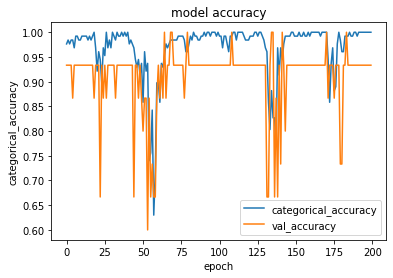

In [60]:
#accuracy chart
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('categorical_accuracy')
plt.xlabel('epoch')
plt.legend(['categorical_accuracy', 'val_accuracy'], loc='lower right')
plt.show()

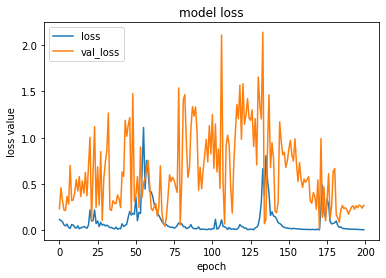

In [61]:
#loss chart
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss value')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

In [45]:
model.save('action.h5')

In [ ]:
del model

In [ ]:
model.load_weights('action.h5')

In [62]:
#showing model descriptions
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 20, 64)            442112    
                                                                 
 lstm_4 (LSTM)               (None, 20, 32)            12416     
                                                                 
 lstm_5 (LSTM)               (None, 64)                24832     
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 5)                 165       
                                                                 
Total params: 485,765
Trainable params: 485,765
Non-tr

In [47]:
os.getcwd()

'E:\\Me\\Model EDITABLE FINAL\\FinalModel'

# 8. Making Predictions from the data

In [63]:
res = model.predict(X_test)

In [64]:
actions[np.argmax(res[0])]

'Terima Kasih'

In [65]:
actions[np.argmax(y_test[1])]

'Anda'

# 9. Saving Model Weights 

In [ ]:
model.save('model.h5')

In [ ]:
del model

In [ ]:
model.load_weights('model.h5')

# 10. Evaluation with Confusion Matrix

In [66]:
#multilabel will give confusion matrix to every label
#accuracy score for accuracy testing
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [67]:
yhat = model.predict(X_test)

In [68]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [69]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[6, 0],
        [0, 2]],

       [[7, 0],
        [0, 1]],

       [[5, 0],
        [0, 3]],

       [[6, 0],
        [0, 2]]], dtype=int64)

In [55]:
accuracy_score(ytrue, yhat)

1.0

# 11. Realtime Testing

In [70]:
colors = [(245,117,16), (117,245,16), (16,117,245), (120,127,245), (130,125,145)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [71]:
sequence = []
sentence = []
threshold = 0.65 #the model will only recognize actions in a minimum value decided

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_landmarks(image, results)
        

        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-20:]
        
        if len(sequence) == 20:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #Visualization
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]: #checking the current action not the same as last sentences
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:] #if the sentences has more than 5, we only take the last 5 value

            #Probabilities bar
            image = prob_viz(res, actions, image, colors)
        
        #position of sentences rectangle
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break window
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class '

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Terima Kasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Terima Kasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Terima Kasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Terima Kasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Terima Kasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Terima Kasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Terima Kasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Terima Kasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Terima Kasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Terima Kasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Terima Kasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Terima Kasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Terima Kasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Terima Kasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Terima Kasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.So

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Terima Kasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOut